In [70]:
!pip install cvxopt

In [71]:
import cvxpy as cp 
import numpy as np 
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt
from cvxopt import blas, solvers 

In [72]:
tickers = ['SPY', 'VOO', 'QQQ', 'IVV']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01", interval="1d")
data.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                           Close  \
                   IVV         QQQ         SPY         VOO         IVV   
Date                                                                     
2020-01-02  302.929230  209.976059  302.208588  276.999207  326.320007   
2020-01-03  300.599121  208.052734  299.920258  274.975708  323.809998   
2020-01-06  301.787476  209.393250  301.064392  276.006012  325.089996   
2020-01-07  300.961243  209.364120  300.217957  275.244873  324.200012   
2020-01-08  302.492920  210.937790  301.817963  276.665070  325.850006   

                                                      High              ...  \
                   QQQ         SPY         VOO         IVV         QQQ  ...   
Date                                                                    ...   
2020-01-02  216.160004  324.869995  298.420013  326.320007  216.160004  ...   
2020-01-03  214.179993  322.410004  296.239990  325.059998  215.470001  ...   
2020-01-06  215.559998  323.640015  297.350006  325.140015  215.589996  ...   
2020-01-07  215.529999  322.730011  296.529999  324.970001  216.139999  ...   
2020-01-08  217.149994  324.450012  298.059998  327.209991  218.139999  ...   

                   Low                    Open                          \
                   SPY         VOO         IVV         QQQ         SPY   
Date                                                                     
2020-01-02  322.529999  296.339996  324.980011  214.399994  323.540009   
2020-01-03  321.100006  295.040009  322.529999  213.300003  321.160004   
2020-01-06  320.359985  294.350006  321.890015  212.500000  320.489990   
2020-01-07  322.239990  296.059998  324.459991  215.639999  323.019989   
2020-01-08  322.670013  296.470001  324.380005  215.500000  322.940002   

                         Volume                               
                   VOO      IVV       QQQ       SPY      VOO  
Date                                                          
2020-01-02  297.290009  4070500  30969400  59151200  3142400  
2020-01-03  295.220001  4290400  27518900  77709700  3247900  
2020-01-06  294.420013  4212000  21655300  55653900  2777100  
2020-01-07  296.820007  3632500  22139300  40496400  2251800  
2020-01-08  296.709991  3912100  26397300  68296000  3719500  

[5 rows x 24 columns]

In [73]:
adj_close = data['Adj Close']
adj_close.head()

,IVV,QQQ,SPY,VOO
Date,,,,
2020-01-02,302.929230,209.976059,302.208588,276.999207
2020-01-03,300.599121,208.052734,299.920258,274.975708
2020-01-06,301.787476,209.393250,301.064392,276.006012
2020-01-07,300.961243,209.364120,300.217957,275.244873
2020-01-08,302.492920,210.937790,301.817963,276.665070


In [74]:
missing_per_stock = adj_close.isna().sum()
missing_per_stock

IVV    0
QQQ    0
SPY    0
VOO    0
dtype: int64

In [75]:
daily_returns = adj_close.pct_change()
daily_returns 

,IVV,QQQ,SPY,VOO
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.007692,-0.009160,-0.007572,-0.007305
2020-01-06,0.003953,0.006443,0.003815,0.003747
2020-01-07,-0.002738,-0.000139,-0.002811,-0.002758
2020-01-08,0.005089,0.007516,0.005329,0.005160
...,...,...,...,...
2022-12-23,0.005201,0.002249,0.005752,0.005601
2022-12-27,-0.003848,-0.014139,-0.003944,-0.003979
2022-12-28,-0.012138,-0.013203,-0.012428,-0.012269


In [76]:
monthly_adj_close = adj_close.resample('M').last()
monthly_returns = monthly_adj_close.pct_change()

monthly_returns.head()

,IVV,QQQ,SPY,VOO
Date,,,,
2020-01-31,NaN,NaN,NaN,NaN
2020-02-29,-0.084550,-0.060574,-0.079166,-0.080997
2020-03-31,-0.121290,-0.072858,-0.124871,-0.124414
2020-04-30,0.126780,0.149737,0.126984,0.127860
2020-05-31,0.048152,0.066009,0.047645,0.047361


In [77]:
log_daily_returns = np.log(adj_close / adj_close.shift(1))

In [78]:
daily_returns.dropna(inplace=True)
monthly_returns.dropna(inplace=True)
log_daily_returns.dropna(inplace=True)

In [79]:
def calculate_mean_returns(returns): 

    mean_returns = returns.mean() 
    return mean_returns 

def calculate_variance(returns):

    variance = returns.var()
    return variance 

def calculate_covariance_matrix(returns):

    covariance_matrix = returns.cov()
    return covariance_matrix 

In [80]:
mean_returns = calculate_mean_returns(daily_returns)
print("Mean Returns:\n", mean_returns)

variance = calculate_variance(daily_returns)
print("\nVariance:\n", variance)

cov_matrix = calculate_covariance_matrix(daily_returns)
print("\nCovariance Matrix:\n", cov_matrix)

Mean Returns:
 IVV    0.000410
QQQ    0.000475
SPY    0.000404
VOO    0.000410
dtype: float64

Variance:
 IVV    0.000257
QQQ    0.000350
SPY    0.000248
VOO    0.000257
dtype: float64

Covariance Matrix:
           IVV       QQQ       SPY       VOO
IVV  0.000257  0.000279  0.000252  0.000257
QQQ  0.000279  0.000350  0.000275  0.000279
SPY  0.000252  0.000275  0.000248  0.000252
VOO  0.000257  0.000279  0.000252  0.000257


In [81]:
def simulate_random_weights(num_assets): 
    weights = np.random.random(num_assets) 
    weights /= np.sum(weights) 

    return weights 

In [82]:
def simulate_multiple_portfolios(num_assets, num_portfolios): 

    portfolios = np.zeros((num_portfolios, num_assets))

    for i in range(num_portfolios): 
        portfolios[i] = simulate_random_weights(num_assets)

    return portfolios 

In [83]:
num_assets = 4

random_weights = simulate_random_weights(num_assets)
print("Random Portfolio Weights:\n", random_weights)

print("Sum of Weights:", np.sum(random_weights))

Random Portfolio Weights:
 [0.30727529 0.24452511 0.04712439 0.4010752 ]
Sum of Weights: 1.0


In [84]:
def calculate_portfolio_return(weights, mean_returns): 

    return np.dot(weights, mean_returns) 

def calculate_portfolio_risk(weights, covariance_matrix): 

    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    return np.sqrt(portfolio_variance) 

In [85]:
portfolio_return = calculate_portfolio_return(random_weights, mean_returns)
print("Expected Portfolio Return:", portfolio_return)

portfolio_risk = calculate_portfolio_risk(random_weights, cov_matrix)
print("Portfolio Risk (Standard Deviation):", portfolio_risk)

Expected Portfolio Return: 0.00042544867688946644
Portfolio Risk (Standard Deviation): 0.01643636574172807


In [86]:
def calculate_sharpe_ratio(portfolio_return, portfolio_risk, risk_free_rate): 

    return(portfolio_return - risk_free_rate) / portfolio_risk

In [87]:
risk_free_rate = 0.005

sharpe_ratio = calculate_sharpe_ratio(portfolio_return, portfolio_risk, risk_free_rate)
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -0.2783189054680636


In [88]:
def run_monte_carlo_simulation(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((num_portfolios, 3))
    columns = ['Return', 'Risk', 'Sharpe Ratio']
    weights_record = []

    for i in range (num_portfolios): 
        weights = simulate_random_weights(len(mean_returns))
        portfolio_return = calculate_portfolio_return(weights, mean_returns)
        portfolio_risk = calculate_portfolio_risk(weights, cov_matrix) 
        sharpe_ratio = calculate_sharpe_ratio(portfolio_return, portfolio_risk, risk_free_rate)

        results[i] = [portfolio_return, portfolio_risk, sharpe_ratio]
        weights_record.append(weights)

    return pd.DataFrame(results, columns=['Return', 'Risk', 'Sharpe Ratio']), weights_record

In [89]:
num_portfolios = 10000

simulation_results, weights_record = run_monte_carlo_simulation(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

print(simulation_results.head())

     Return      Risk  Sharpe Ratio
0  0.000415  0.016128     -0.284269
1  0.000411  0.016026     -0.286354
2  0.000426  0.016430     -0.278381
3  0.000424  0.016404     -0.278933
4  0.000416  0.016141     -0.284002


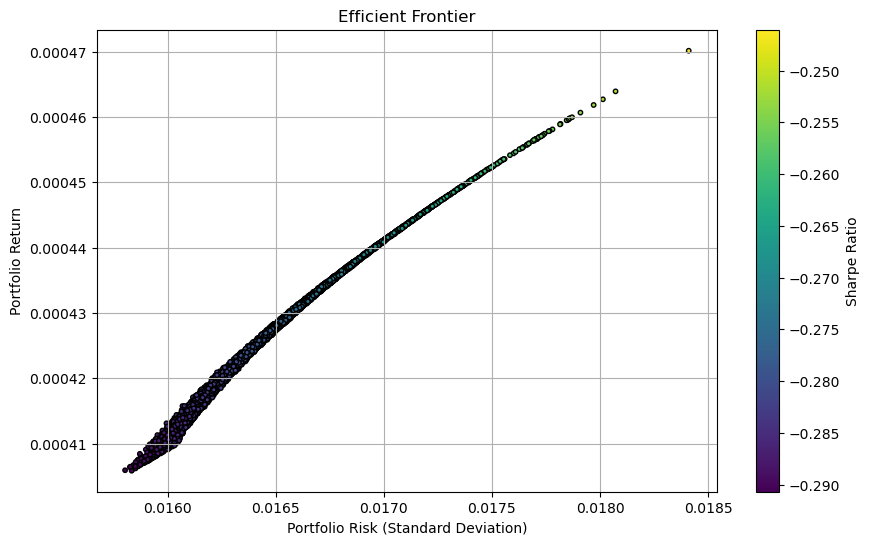

In [90]:
def plot_efficient_frontier(simulation_results): 

    plt.figure(figsize=(10,6))
    plt.scatter(simulation_results['Risk'], simulation_results['Return'], 
                c=simulation_results['Sharpe Ratio'], cmap='viridis', edgecolors='k', s=10)
    
    plt.title('Efficient Frontier')
    plt.xlabel('Portfolio Risk (Standard Deviation)')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label='Sharpe Ratio')  # Color bar for Sharpe Ratio
    plt.grid(True)
    plt.show()


plot_efficient_frontier(simulation_results)

In [98]:
def identify_optimal_portfolios(simulation_results): 

    max_sharpe_idx = simulation_results['Sharpe Ratio'].idxmax() 
    max_sharpe_portfolio = simulation_results.iloc[max_sharpe_idx]
    max_sharpe_weights = weights_record[max_sharpe_idx]

    min_risk_idx = simulation_results['Risk'].idxmin()
    min_risk_portfolio = simulation_results.iloc[min_risk_idx]
    min_risk_weights = weights_record[min_risk_idx]


    optimal_portfolios = {
        'Max Sharpe Ratio': {
            'Return': max_sharpe_portfolio['Return'],
            'Risk': max_sharpe_portfolio['Risk'],
            'Sharpe Ratio': max_sharpe_portfolio['Sharpe Ratio'],
            'Weights': max_sharpe_weights
        },
        'Min Risk': {
            'Return': min_risk_portfolio['Return'],
            'Risk': min_risk_portfolio['Risk'],
            'Sharpe Ratio': min_risk_portfolio['Sharpe Ratio'],
            'Weights': min_risk_weights
        }
    }

    return optimal_portfolios

In [100]:
optimal_portfolios = identify_optimal_portfolios(simulation_results)

print("Optimal Portfolios:")
print("Max Sharpe Ratio Portfolio:\n", optimal_portfolios['Max Sharpe Ratio'])
print("Min Risk Portfolio:\n", optimal_portfolios['Min Risk'])

Optimal Portfolios:
Max Sharpe Ratio Portfolio:
 {'Return': 0.0004701379240179229, 'Risk': 0.01841000580728536, 'Sharpe Ratio': -0.24605435345324458, 'Weights': array([0.01176495, 0.92417976, 0.03974692, 0.02430836])}
Min Risk Portfolio:
 {'Return': 0.00040591621719726834, 'Risk': 0.015803674730690224, 'Sharpe Ratio': -0.29069718664110256, 'Weights': array([0.0372799 , 0.02034788, 0.90840171, 0.03397051])}


In [102]:
def calculate_equal_weighted_portfolio(mean_returns, covariance_matrix, num_assets):
    equal_weights = np.ones(num_assets) / num_assets 
    portfolio_return = calculate_portfolio_return(equal_weights, mean_returns)
    portfolio_risk = calculate_portfolio_risk(equal_weights, covariance_matrix)
    return portfolio_return, portfolio_risk


equal_weighted_return, equal_weighted_risk = calculate_equal_weighted_portfolio(mean_returns, cov_matrix, len(mean_returns))




In [104]:
def compare_portfolios(optimal_portfolios, equal_weighted_return, equal_weighted_risk, risk_free_rate):

    max_sharpe_return = optimal_portfolios['Max Sharpe Ratio']['Return']
    max_sharpe_risk = optimal_portfolios['Max Sharpe Ratio']['Risk']
    min_risk_return = optimal_portfolios['Min Risk']['Return']
    min_risk_risk = optimal_portfolios['Min Risk']['Risk']


    max_sharpe_ratio = calculate_sharpe_ratio(max_sharpe_return, max_sharpe_risk, risk_free_rate)
    min_risk_sharpe_ratio = calculate_sharpe_ratio(min_risk_return, min_risk_risk, risk_free_rate )
    equal_weighted_sharpe_ratio = calculate_sharpe_ratio(equal_weighted_return, equal_weighted_risk, risk_free_rate)
    
    comparison_data = {
        'Strategy': ['Max Sharpe Ratio', 'Min Risk', 'Equal Weighted'],
        'Return': [
            max_sharpe_return, 
            min_risk_return, 
            equal_weighted_return
        ],
        'Risk': [
            max_sharpe_risk, 
            min_risk_risk, 
            equal_weighted_risk
        ],
        'Sharpe Ratio': [
            max_sharpe_ratio, 
            min_risk_sharpe_ratio, 
            equal_weighted_sharpe_ratio
        ]
    }


    comparison_df = pd.DataFrame(comparison_data)
    
    return comparison_df

In [106]:
comparison_df = compare_portfolios(optimal_portfolios, equal_weighted_return, equal_weighted_risk, risk_free_rate)
print("\nPortfolio Comparison:")
print(comparison_df)


Portfolio Comparison:
           Strategy    Return      Risk  Sharpe Ratio
0  Max Sharpe Ratio  0.000470  0.018410     -0.246054
1          Min Risk  0.000406  0.015804     -0.290697
2    Equal Weighted  0.000425  0.016393     -0.279094


In [124]:
def classify_market_conditions(price_data):
    daily_returns = price_data.pct_change() 
    market_conditions = pd.Series(index=daily_returns.index, dtype='object')  

    bull_threshold = 0.01  
    bear_threshold = -0.01  

    market_conditions[daily_returns > bull_threshold] = 'Bull'
    market_conditions[daily_returns < bear_threshold] = 'Bear'
    market_conditions[(daily_returns <= bull_threshold) & (daily_returns >= bear_threshold)] = 'Sideways'

    return market_conditions




In [126]:
def performance_by_market_condition(portfolio_returns, market_conditions):
    performance_summary = {}  

    
    for condition in market_conditions.unique():
        condition_returns = portfolio_returns[market_conditions == condition]  
        
        performance_summary[condition] = {
            'Average Return': condition_returns.mean(),  
            'Total Return' : (1 + condition_returns).prod() - 1,  
            'Volatility': condition_returns.std()  
        }

   
    return pd.DataFrame(performance_summary).T


In [120]:

max_sharpe_weights = optimal_portfolios['Max Sharpe Ratio']['Weights']  
max_sharpe_returns = daily_returns.dot(max_sharpe_weights)  

min_risk_weights = optimal_portfolios['Min Risk']['Weights']  
min_risk_returns = daily_returns.dot(min_risk_weights)  

num_assets = len(daily_returns.columns)  
equal_weighted_weights = np.ones(num_assets) / num_assets  
equal_weighted_returns = daily_returns.dot(equal_weighted_weights)  

market_conditions = classify_market_conditions(adj_close['SPY'])  


max_sharpe_performance = performance_by_market_condition(max_sharpe_returns, market_conditions)
min_risk_performance = performance_by_market_condition(min_risk_returns, market_conditions)
equal_weighted_performance = performance_by_market_condition(equal_weighted_returns, market_conditions)



In [128]:

results = pd.concat([max_sharpe_performance, min_risk_performance, equal_weighted_performance], axis=1)

results.columns = pd.MultiIndex.from_product([['Max Sharpe', 'Min Risk', 'Equal Weighted'], max_sharpe_performance.columns])

print("Portfolio Performance by Market Conditions:")
print(results)


Portfolio Performance by Market Conditions:
             Max Sharpe                               Min Risk               \
         Average Return Total Return Volatility Average Return Total Return   
NaN                 NaN     0.000000        NaN            NaN     0.000000   
Sideways       0.000358     0.162675   0.008627       0.000203     0.093129   
Bear          -0.025223    -0.961705   0.016234      -0.022378    -0.944417   
Bull           0.021456    27.168458   0.014717       0.019322    19.338975   

                    Equal Weighted                          
         Volatility Average Return Total Return Volatility  
NaN             NaN            NaN     0.000000        NaN  
Sideways   0.005251       0.000243     0.112184   0.005816  
Bear       0.015137      -0.023174    -0.949902   0.015351  
Bull       0.012373       0.019933    21.334707   0.012920  


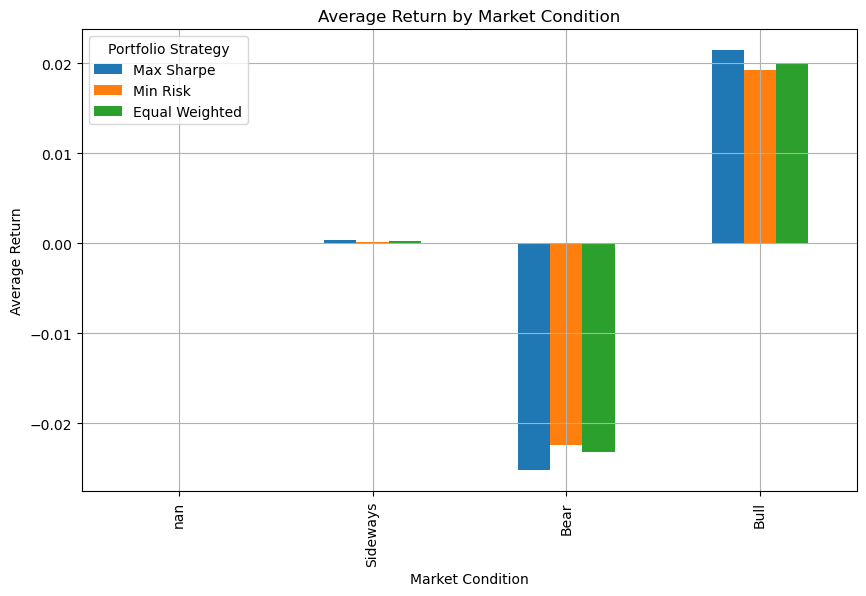

In [130]:
avg_returns = results.xs('Average Return', level=1, axis=1)

avg_returns.plot(kind='bar', figsize=(10, 6))
plt.title('Average Return by Market Condition')
plt.xlabel('Market Condition')
plt.ylabel('Average Return')
plt.legend(title='Portfolio Strategy')
plt.grid(True)
plt.show()


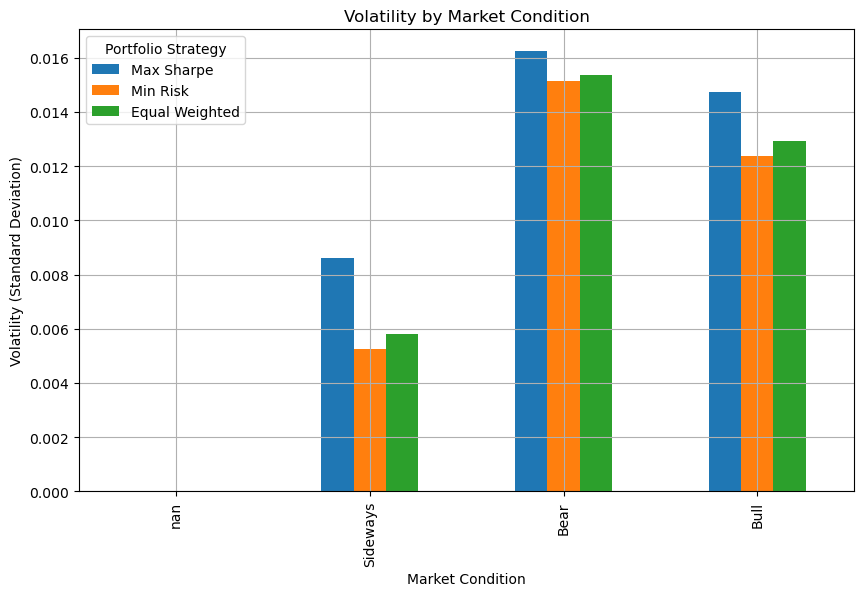

In [132]:
volatility = results.xs('Volatility', level=1, axis=1)

volatility.plot(kind='bar', figsize=(10, 6))
plt.title('Volatility by Market Condition')
plt.xlabel('Market Condition')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend(title='Portfolio Strategy')
plt.grid(True)
plt.show()
